# Unfooded Country Analysis from FAO R&D's department  

## 1. Data preprocessing

    1.1 Loading natives data with Pandas
        1.1.1 Food resources availibility's by countries by product
        1.1.2 Amout of food resources given to countries in food deficit
        1.1.3 Food insecurity describes by the number of undernurished people
        1.1.4 Population by countries
    1.2 Have a quick look to our data distributions
    1.3 How to deal with missing values

## 2. Compute data for answering to Marc's requests

    2.1 Unnourished people proportion in 2017
    2.2 Number of people which can be fooded with global food stock
    2.3 Number of people which can be fooded with vegetables
    2.4 The use of global food stock across each countries


## 3. Compute data for answering to Mélanie's requests

    3.1 Solution for request 1
    3.2 Solution for request 2
    3.3 Solution for request 3

# 1. Data preprocessing
## 1.1 Loading natives data into Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
print(os.getcwd())

C:\Users\antoi\FAO-Analysis\notebook


### 1.1.1 Availibility of food resources by countries by type of product

In [3]:
dispo_alim = pd.read_csv("../dispo_alimentaire.csv", header=0, sep=",")

In [4]:
dispo_alim

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN
15602,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [5]:
dispo_alim.isna().describe()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
count,15605,15605,15605,15605,15605,15605,15605,15605,15605,15605,15605,15605,15605,15605,15605,15605,15605,15605
unique,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,True,True,True
freq,15605,15605,15605,12885,10109,14241,14015,11794,11561,15382,12226,14852,14015,11327,9180,13514,13313,8829


### 1.1.2 Food resources given to countries in food deficit

In [6]:
aide_alim = pd.read_csv('../aide_alimentaire.csv', header=0, sep=',')

In [7]:
aide_alim.head(10)

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
5,Afghanistan,2014,Céréales,15989
6,Afghanistan,2013,"Fruits secs, total",85
7,Afghanistan,2013,Huiles végétales,11087
8,Afghanistan,2014,Huiles végétales,8185
9,Afghanistan,2013,"Légumineuses Sèches,Tot.",11761


In [8]:
aide_alim.sort_values(['Pays bénéficiaire','Année'], ascending=True)

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
2,Afghanistan,2013,Blé et Farin,39224
4,Afghanistan,2013,Céréales,40504
6,Afghanistan,2013,"Fruits secs, total",85
7,Afghanistan,2013,Huiles végétales,11087
...,...,...,...,...
372,Éthiopie,2015,Huiles végétales,1826
375,Éthiopie,2015,"Légumineuses Sèches,Tot.",10519
378,Éthiopie,2015,Mélanges et préparations,4512
381,Éthiopie,2015,Non-céréales,15151


In [9]:
aide_alim.isna().describe()

,Pays bénéficiaire,Année,Produit,Valeur
count,1475,1475,1475,1475
unique,1,1,1,1
top,False,False,False,False
freq,1475,1475,1475,1475


### 1.2.3 Food insecurity describe by the number of undernurished people

In [10]:
col_types = {'Zone' : str, 'Année' : str, 'Valeur' : int}
sous_alim = pd.read_csv('../sous_nutrition.csv', header=0, sep=',')

In [11]:
sous_alim['Valeur'].isna().describe()

count      1218
unique        2
top       False
freq        624
Name: Valeur, dtype: object

In [12]:
sous_alim.head(5)

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [13]:
sous_alim['Valeur'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
1213     True
1214     True
1215     True
1216     True
1217     True
Name: Valeur, Length: 1218, dtype: bool

### 1.2.4 Population by countries

In [14]:
pop_pays = pd.read_csv('../population.csv', header=0, sep=',')

In [15]:
pop_pays.head(5)

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


<AxesSubplot:xlabel='Zone'>

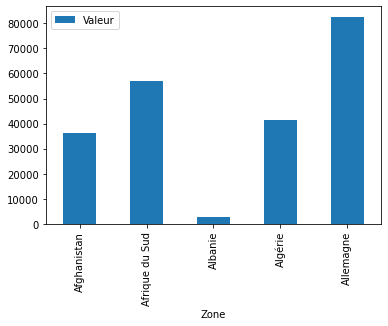

In [16]:
pop_pays[pop_pays['Année'] == 2017].set_index('Zone').head(5).plot.bar(y='Valeur')

In [17]:
pop_pays.isna().describe()

,Zone,Année,Valeur
count,1416,1416,1416
unique,1,1,1
top,False,False,False
freq,1416,1416,1416


In [168]:
pop_pays_2017 = pop_pays[pop_pays['Année'] == 2017][['Zone','Valeur']]

## 1.3 How to deal with missing values

### 1.3.1 Food Unsecurity's data set

In [19]:
# Le nombre totale de personne en sous nutrition 
col_types = {'Zone' : str, 'Année' : str, 'Valeur' : np.float64}
sous_alim.dtypes

Zone      object
Année     object
Valeur    object
dtype: object

In [20]:
# convert string into float
def convert_string_to_float(value):
    
    if value == '<0.1':
        return 0.1
    else :
        return np.float64(value)
    

In [21]:
# proportion d'occurence '<0.1' dans Valeur 
sous_alim['Valeur'][sous_alim['Valeur'] == '<0.1'].count() / sous_alim['Valeur'].count()

0.19230769230769232

In [22]:
# Delete country with unnourished pop missing values
sous_alim['Valeur'] = pd.to_numeric(sous_alim['Valeur'], errors = 'coerce')
sous_alim.dropna(inplace = True)


In [23]:
# Replace unnourished pop's value '<0.1' by 0.1
## sous_alim['Valeur'] = sous_alim['Valeur'].apply(convert_string_to_float)
## sous_alim.dropna(inplace=True)

In [24]:
# Saving cleaning data a do a copy
sous_alim_copy = sous_alim.copy()

### 1.3.2 global food stock data

In [25]:
# Suppression des lignes entièrement nulles

dispo_alim.dropna(axis = 1, how='all') # drop des colonnes entièrement nulles
dispo_alim = dispo_alim.replace(0, np.nan).dropna(how = 'all' , subset = dispo_alim.columns[3:])
dispo_alim.replace(np.nan, 0, inplace=True) # On assume que toutes les valeurs manquantes soient nulles

## 2.1 Unnourished people proportion in 2017

In [26]:
# La population mondiale en 2017
tot_pop = pop_pays['Valeur'][pop_pays['Année'] == 2017].sum()

In [27]:
# Population total en sous nutrition
tot_pop_sous_alim = sous_alim_copy['Valeur'][sous_alim_copy['Année'] == '2016-2018'].sum()*1000

In [28]:
tot_pop_sous_alim

535700.0

In [29]:
prop_sous_alim = tot_pop_sous_alim / tot_pop

In [30]:
prop_sous_alim

0.07097118203283073

## Visuel

In [31]:
size_prop_sous = [prop_sous_alim, 1-prop_sous_alim]

In [32]:
ranking_sous_alim_pays = sous_alim_copy[sous_alim_copy['Année'] == '2016-2018'][['Zone','Valeur']].sort_values(by='Valeur',ascending=False).head(10)

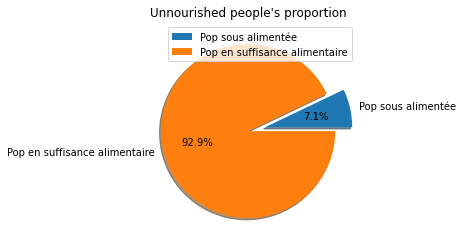

In [33]:

plt.pie(size_prop_sous, labels=['Pop sous alimentée', 'Pop en suffisance alimentaire'], explode = (0.2,0), autopct='%1.1f%%', shadow = True)
plt.legend(loc='upper right')
plt.title(label = "Unnourished people's proportion")
plt.show()

In [34]:
sous_alim_pop_total = sous_alim_copy[sous_alim_copy['Année'] == '2016-2018']['Valeur'].sum()
size = list(ranking_sous_alim_pays.Valeur/sous_alim_pop_total)
autre_country = 1 - sum(size)

In [35]:
labels = [str(int(pos)) + '. ' + label for (pos, label) in zip (np.linspace(1,10,10),list(ranking_sous_alim_pays.Zone))]
size.insert(0, autre_country)
labels.insert(0, 'autres')

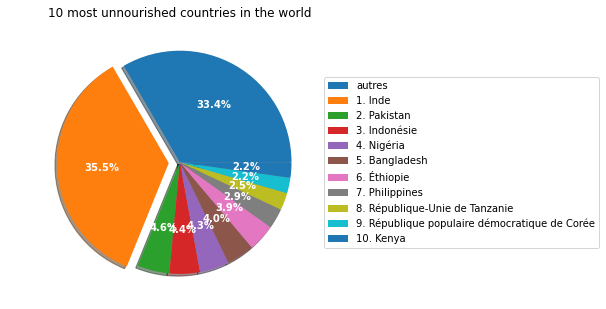

In [36]:
explode = [0 for i in range(1,12)]
explode[1] = 0.1
fig1, ax1  = plt.subplots(figsize=(5,6), subplot_kw=dict(aspect="equal"))
ax1.pie(size, labels=labels, autopct='%1.1f%%',
       shadow = True, textprops=dict(color="w", weight="bold"), explode = explode)
ax1.set_title("10 most unnourished countries in the world")
ax1.legend(labels,
        loc='center left',        
        bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()


## 2.2 Volume of people which can be fooded with global food stock

In [37]:
dispo_alim_copy = dispo_alim.copy()

In [38]:
dispo_alim_copy.describe()

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
count,13484.000000,13484.000000,13484.000000,13484.000000,13484.000000,13484.000000,13484.000000,13484.000000,13484.000000,13484.000000,13484.000000,13484.000000,13484.000000,13484.000000,13484.000000
mean,96.725378,64.151810,36.742955,9.062737,1.122294,1.049105,730.420795,100.278701,96.117843,361.632898,33.647137,742.337585,11.471448,163.503931,-7.742658
std,1913.796919,3241.925642,109.932409,25.036236,3.468144,3.359549,9681.060826,1003.492965,752.320985,4562.443550,628.858147,9969.682766,209.625139,4294.713597,389.832663
min,0.000000,0.000000,-21.000000,-1.930000,-0.030000,-0.370000,-3430.000000,-41.000000,-201.000000,-246.000000,0.000000,0.000000,0.000000,-19.000000,-39863.000000
25%,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,5.000000,0.960000,0.040000,0.050000,12.000000,0.000000,2.000000,6.000000,0.000000,2.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,23.000000,5.622500,0.450000,0.490000,105.000000,6.000000,22.000000,58.000000,0.000000,66.000000,0.000000,0.000000,0.000000
max,150000.000000,347309.000000,1711.000000,430.760000,60.760000,54.970000,739267.000000,42797.000000,63381.000000,426850.000000,55047.000000,739267.000000,17060.000000,326711.000000,5284.000000


In [39]:
volume_dispo_global = dispo_alim_copy['Disponibilité alimentaire (Kcal/personne/jour)'].sum()

In [40]:
dispo_alim_total_pays = dispo_alim_copy[['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)']].groupby('Zone').sum().reset_index()

In [41]:
capacite_alim_pays = dispo_alim_total_pays.join(pop_pays_2017.set_index('Zone'), 'Zone').rename({'Disponibilité alimentaire (Kcal/personne/jour)' : 'Disponibilité alimentaire totale (Kcal/personne/jour)'})

In [42]:
capacite_alim_pays['Disponibilité alimentaire totale'] = capacite_alim_pays['Disponibilité alimentaire (Kcal/personne/jour)'] * capacite_alim_pays['Valeur'] * 1000

In [43]:
# Disponibilité alimentaire mondiale en Kcal
dispo_alim_total = capacite_alim_pays['Disponibilité alimentaire totale'].sum()
# Apport journalier d'une personne adulte estimé à 2500 Kcal
nb_theorique_pers = dispo_alim_total / 2500

In [44]:
nb_theorique_pers

8367593850.9324

## 2.3 Number of people which can be fooded with vegetables

In [45]:
dispo_alim_total_pays_vege = dispo_alim[dispo_alim['Origine'] == 'vegetale'][['Zone','Disponibilité alimentaire (Kcal/personne/jour)']].groupby('Zone').sum().reset_index()

In [46]:
capacite_alim_pays_vege = dispo_alim_total_pays_vege.join(pop_pays_2017.set_index('Zone'), 'Zone')

In [47]:
capacite_alim_pays_vege['Disponibilité Alimentaire totale'] = capacite_alim_pays_vege['Disponibilité alimentaire (Kcal/personne/jour)'] * capacite_alim_pays_vege['Valeur'] * 1000
dispo_total_alim_vege = capacite_alim_pays_vege['Disponibilité Alimentaire totale'].sum()
nb_theorique_pers_vege = dispo_total_alim_vege / 2500

In [48]:
nb_theorique_pers_vege

6904305684.6004

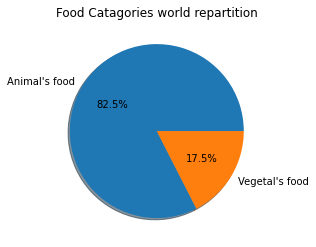

In [49]:
prop_dispo_alim_animal = (dispo_alim_total - dispo_total_alim_vege)/ dispo_alim_total
prop_dispo_alim_vege = dispo_total_alim_vege / dispo_alim_total
plt.pie([prop_dispo_alim_vege, prop_dispo_alim_animal], labels=["Animal's food","Vegetal's food"], shadow=True, autopct='%1.1f%%')
plt.title("Food Catagories world repartition")
plt.show()

In [50]:
# écrire une fonction pour scaler le résultat produit végétale et produit animale

def get_theorical_number(dispo_alim : pd.DataFrame, pop_pays : pd.DataFrame, origine='all') -> float :
        
        if origine != 'all':
            dispo_alim_pays = dispo_alim[dispo_alim['Origine'] == origine][['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)']].groupby('Zone').sum()
        else :
            dispo_alim_pays = dispo_alim[['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)']].groupby('Zone').sum()
        capacite_alim_pays = pop_pays.join(dispo_alim_pays, 'Zone')
        capacite_alim_pays['Disponibilité alimentaire totale'] = capacite_alim_pays['Disponibilité alimentaire (Kcal/personne/jour)'] * capacite_alim_pays['Valeur'] * 1000
        dispo_totale_alim = capacite_alim_pays['Disponibilité alimentaire totale'].sum()
        theorical_number = dispo_totale_alim / 2500
        return theorical_number

In [51]:
get_theorical_number(dispo_alim, pop_pays_2017)

8367593850.9324

## 2.4 The use of the global food stock 

In [52]:
#disp_int = Utilisation + perte 
#disp_int = importation + production  - exportation (Acquisition) + variation de stock

In [53]:
dispo_alim_copy['Disponibilité intérieure'] = dispo_alim_copy['Disponibilité intérieure'].replace(0, np.nan)
dispo_alim_copy.dropna(how = 'all', subset = ['Disponibilité intérieure'], inplace = True)

In [54]:
dispo_alim_copy['Disponibilité intérieure'].sum()

9848994.0

In [55]:
somme_utilisation = dispo_alim_copy[['Aliments pour animaux','Nourriture','Pertes', 'Autres Utilisations','Semences','Traitement']].sum()

In [56]:
sum(dispo_alim_copy[['Importations - Quantité', 'Production', 'Variation de stock']].sum()) - dispo_alim_copy['Exportations - Quantité'].sum()


9849113.0

In [57]:
sum(dispo_alim_copy[['Aliments pour animaux', 'Autres Utilisations','Nourriture', 'Semences', 'Traitement', 'Pertes']].sum())

9858548.0

In [58]:
somme_utilisation[0:3].values

array([1304245., 4876216.,  453698.])

In [59]:
prop_value = np.append(somme_utilisation[0:3], np.sum(somme_utilisation[3:].values))

In [60]:
prop_value / np.sum(prop_value)

array([0.13229585, 0.49461807, 0.04602077, 0.3270653 ])

In [61]:
def func(pct):
    dispo_alim_totale = dispo_alim_copy['Disponibilité intérieure'].sum()
    absolute = int(np.round(pct/100. * dispo_alim_totale))
    return "{:.1f}%\n({:d} m.t)".format(pct, absolute)

In [62]:
lambda pct, allvalls : func(pct,allvals)

<function __main__.<lambda>(pct, allvalls)>

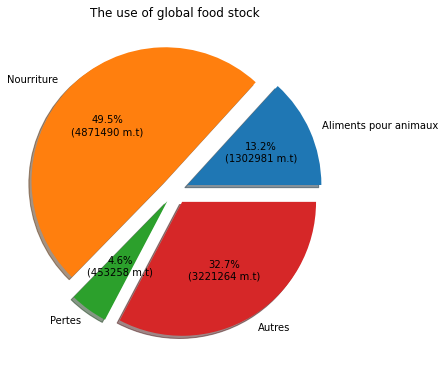

In [63]:
np.sum(dispo_alim_copy[0:3])
prop_dispo_alim = prop_value / np.sum(prop_value)
plt.figure(figsize=(6,10))
plt.pie(x=prop_dispo_alim,
        labels= ['Aliments pour animaux', 'Nourriture', 'Pertes','Autres'], 
        shadow = True,
        autopct = lambda pct : func(pct),
        textprops=dict(color="black", size="10"),
        explode = [0.1,0.1,0.1,0.1]
       )
plt.title("The use of global food stock")
plt.show()

# 3. Compute data for answering to Mélanie's requests

## 3.1.1 Top of Unnourished people proportion's by Country in 2017

In [64]:
pop_pays_2017_copy = pop_pays_2017.copy()
sous_alim_copy = sous_alim.copy()

In [65]:
pop_pays_2017_copy[['Zone', 'Valeur']]

,Zone,Valeur
4,Afghanistan,36296.113
10,Afrique du Sud,57009.756
16,Albanie,2884.169
22,Algérie,41389.189
28,Allemagne,82658.409
...,...,...
1390,Venezuela (République bolivarienne du),29402.484
1396,Viet Nam,94600.648
1402,Yémen,27834.819
1408,Zambie,16853.599


In [66]:
sous_alim_copy = sous_alim_copy[sous_alim_copy['Année'] == '2016-2018'][['Zone','Valeur']]

In [67]:
sous_alim_copy.rename(columns={'Valeur' : 'pop_sous_alim'},inplace=True)

In [68]:
prop_pop_sous_alim = sous_alim_copy.join(pop_pays_2017_copy.set_index('Zone'),'Zone')

In [69]:
# convertir la population sous alimentée en milliers d'hab
prop_pop_sous_alim['pop_sous_alim'] = (prop_pop_sous_alim['pop_sous_alim'] * 1000)

In [70]:
prop_pop_sous_alim.rename(columns={'Valeur' : 'pop_totale'}, inplace=True)

In [71]:
prop_pop_sous_alim['prop_pop_sous_alim'] = prop_pop_sous_alim['pop_sous_alim'] / prop_pop_sous_alim['pop_totale']

In [72]:
prop_pop_sous_alim.sort_values('prop_pop_sous_alim', ascending=False).head(12)

,Zone,pop_sous_alim,pop_totale,prop_pop_sous_alim
472,Haïti,5300.0,10982.366,0.482592
946,République populaire démocratique de Corée,12000.0,25429.825,0.471887
652,Madagascar,10500.0,25570.512,0.410629
622,Libéria,1800.0,4702.226,0.382797
604,Lesotho,800.0,2091.534,0.382494
1102,Tchad,5700.0,15016.753,0.379576
970,Rwanda,4200.0,11980.961,0.350556
730,Mozambique,9400.0,28649.018,0.328109
1120,Timor-Leste,400.0,1243.258,0.321735
4,Afghanistan,10500.0,36296.113,0.289287


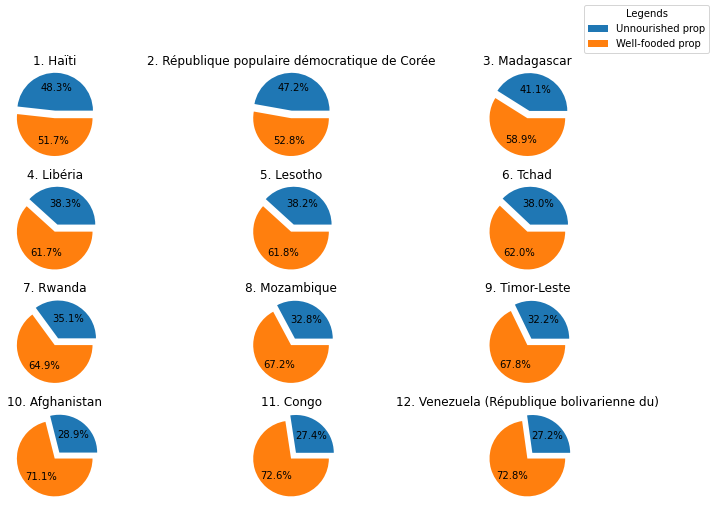

In [73]:
distribution = prop_pop_sous_alim.sort_values('prop_pop_sous_alim', ascending=False).head(12)

indexs = [(row,column) for row in range(0,4) for column in range(0,3)]

fig, axs = plt.subplots(4,3,figsize=(12,8))
axes_number = 0
for index in indexs : 
    size = distribution.iloc[axes_number].prop_pop_sous_alim
    inv_size = 1 - size
    title = distribution.iloc[axes_number].Zone
    axs[index].pie(x= [size, inv_size], explode = [0.2,0], autopct ='%1.1f%%' )
    axs[index].set_title(str(axes_number + 1) + '. '+ title)
    axes_number+=1
fig.legend(labels=['Unnourished prop','Well-fooded prop'],
          title='Legends')

## 3.2 Top 10 of  most supported food aid countries since 2013

In [74]:
aide_alim_copy = aide_alim.copy()

In [75]:
# Aide totale perçue depuis 2013
aide_alim_copy.rename(columns={'Valeur' : 'Qte Aide'}, inplace = True)
aide_alim_index = aide_alim_copy[aide_alim["Année"] >= 2013].groupby(by=['Pays bénéficiaire', 'Année']).agg({'Qte Aide' : 'sum'})


In [76]:
global_supported_df = aide_alim_index.reset_index().drop(columns=['Année']).groupby(by='Pays bénéficiaire').sum().sort_values('Qte Aide', ascending = False)
top_supported_df = global_supported_df.head(10)
other_supported_df = global_supported_df.iloc[11:,:].sum()
other_supported_df = top_supported_df.append(other_supported_df, ignore_index = True).set_index(top_supported_df.index.insert(11, "Other"))

In [77]:
top_supported_df

,Qte Aide
Pays bénéficiaire,
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784
Kenya,552836
Bangladesh,348188
Somalie,292678
République démocratique du Congo,288502


In [78]:
qte_aide_totale = np.sum(other_supported_df)

In [79]:
def absolute_value(pct):
    absolute = int(round(pct/100 * qte_aide_totale))
    return "{:.1f}%\n({:d} t)".format(pct, absolute)

In [80]:
prop_ = top_supported_df['Qte Aide'] / top_supported_df['Qte Aide'].sum()
prop_other = other_supported_df['Qte Aide'] / other_supported_df['Qte Aide'].sum()

Text(0.5, 1.0, '10 most supported countries since 2013')

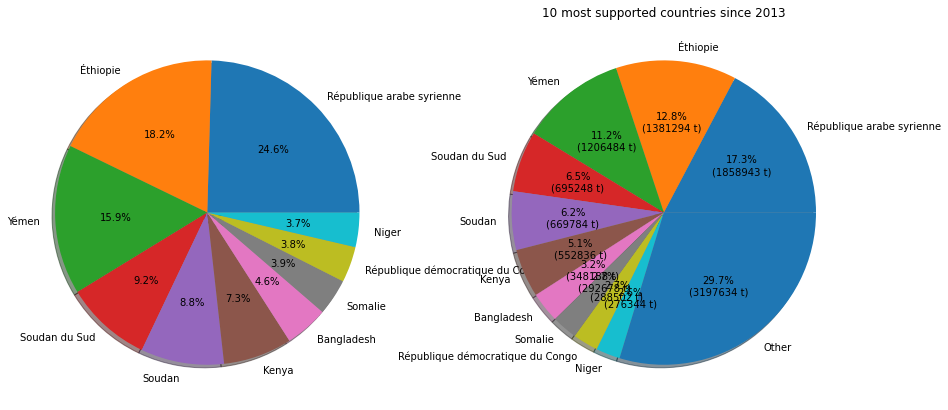

In [81]:
fig, axs = plt.subplots(1,2,figsize=(15,10))
axs[0].pie(prop_, labels=top_supported_df.index, autopct = '%1.1f%%', normalize = True, shadow=True)
axs[1].pie(prop_other, labels = other_supported_df.index, autopct = lambda pct : absolute_value(pct) , normalize = True, shadow=True)
plt.title("10 most supported countries since 2013")

In [82]:
# Etudier la quantité d'aide en kg/hab sous alimenté pour évaluer le soutient reçu du pays bénéficiaire entre 2013 et 2016

In [283]:
# Qte d'aide moyenne reçue entre 2013 et 2016 
mean_aide_alim = aide_alim_copy.groupby(by=['Pays bénéficiaire', 'Année']).sum().reset_index().groupby(by=['Pays bénéficiaire']).mean().drop(columns=['Année'])

In [84]:
# Qte d'aide perçue estimée en 2017 
mean_aide_alim.sort_values('Qte Aide', ascending = False).head(10)

,Qte Aide
Pays bénéficiaire,
République arabe syrienne,464735.750000
Éthiopie,460431.333333
Yémen,301621.000000
Soudan du Sud,231749.333333
Soudan,223261.333333
Kenya,184278.666667
Bangladesh,116062.666667
Somalie,97559.333333
République démocratique du Congo,96167.333333


In [85]:
mean_aide_alim.loc['Pakistan']


Qte Aide    77024.0
Name: Pakistan, dtype: float64

In [121]:
sous_alim_copy = sous_alim.copy()

In [122]:
# Reformatter la colonne Année
lambda x : int(x.split('-')[0]) + 1
sous_alim_copy['Année'] = sous_alim_copy['Année'].apply(lambda x : int(x.split('-')[0]) + 1)

In [130]:
sous_alim_2017 = sous_alim_copy[sous_alim_copy['Année'] == 2017].rename(columns={'Zone' : 'Pays bénéficiaire'})

In [131]:
ratio_aide_pays = sous_alim_2017.join(mean_aide_alim, 'Pays bénéficiaire')

In [134]:
# Nan : Qte d'aide manquante pour le pays concerné
ratio_aide_pays[ratio_aide_pays['Pays bénéficiaire'] == 'République arabe syrienne']

,Pays bénéficiaire,Année,Valeur,Qte Aide


In [91]:
# Suppression des pays avec une quantité d'aide perçue nulle
ratio_aide_pays.dropna(inplace=True)

In [92]:
ratio_aide_pays.rename(columns={'Valeur' : 'pop_sous_alim'}, inplace=True)

In [93]:
ratio_aide_pays['Qte Aide (kg/hab)']  = round(((ratio_aide_pays['Qte Aide']) * 1000 / (ratio_aide_pays['pop_sous_alim'] * 1000000)), 4)

In [94]:
ranking_ratio_aide_pays = ratio_aide_pays.sort_values('Qte Aide (kg/hab)', ascending = False)

In [120]:
ranking_ratio_aide_pays.head(15).set_index(np.linspace(1,15,15))

,Pays bénéficiaire,Année,pop_sous_alim,Qte Aide,Qte Aide (kg/hab)
1.0,Mali,2017,1.0,49862.000000,49.8620
2.0,Soudan,2017,5.0,223261.333333,44.6523
3.0,République dominicaine,2017,0.6,21126.500000,35.2108
4.0,Mauritanie,2017,0.5,14295.500000,28.5910
5.0,Nicaragua,2017,1.1,28833.000000,26.2118
6.0,Éthiopie,2017,21.1,460431.333333,21.8214
7.0,Sénégal,2017,1.5,29920.666667,19.9471
8.0,Algérie,2017,1.3,20278.500000,15.5988
9.0,Togo,2017,1.6,24804.000000,15.5025
10.0,Kenya,2017,11.9,184278.666667,15.4856


## 3.3 Food safety and coverage  

In [96]:
# Etudier l'impact des aides sur la quantité disponible par habitant dans les pays les plus déficitaires.
# Objectif : Prioriser les aides pour les pays les plus déficitaires 

In [97]:
# Les pays avec le plus de disponibilité par hab pour 

In [101]:
dispo_alim_copy = dispo_alim.copy()

In [102]:
dispo_int_for_ranking = dispo_alim_copy.groupby(by=['Zone']).sum()[['Disponibilité alimentaire (Kcal/personne/jour)']]

In [103]:
pays_riche_alim = dispo_int_for_ranking.sort_values('Disponibilité alimentaire (Kcal/personne/jour)',ascending = False).head(15)
pays_pauvre_alim = dispo_int_for_ranking.sort_values('Disponibilité alimentaire (Kcal/personne/jour)',ascending = True).head(15)

In [104]:
pays_riche_alim

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Autriche,3770.0
Belgique,3737.0
Turquie,3708.0
États-Unis d'Amérique,3682.0
Israël,3610.0
Irlande,3602.0
Italie,3578.0
Luxembourg,3540.0
Égypte,3518.0


In [138]:
pays_pauvre_alim

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
République centrafricaine,1879.0
Zambie,1924.0
Madagascar,2056.0
Afghanistan,2087.0
Haïti,2089.0
République populaire démocratique de Corée,2093.0
Tchad,2109.0
Zimbabwe,2113.0
Ouganda,2126.0


## Food safety additional analysis 

In [139]:
# Quantité nécessaire en nutriment pour une alimentation équilibrée et un apport de 2500Kcal
# 15 % proteine --> 375 Kcal / 4
# 40 % lipide --> 1000 Kcal / 9 
# 45 % glucide --> 1125 Kcal / 4

In [140]:
apport_kg = sum([375/4 , 1000/9, 1125/4])

In [141]:
apport_kg

486.1111111111111

In [143]:
def func_kcal(pct):
    absolute = int(np.round(pct/100. * 2500))
    return "{:.1f}%\n({:d} Kcal)".format(pct, absolute)

In [144]:
def func_g(pct):
    absolute = int(np.round(pct/100. * apport_kg))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

Text(0.5, 0.98, "nutriment-adult's recommanded proportion")

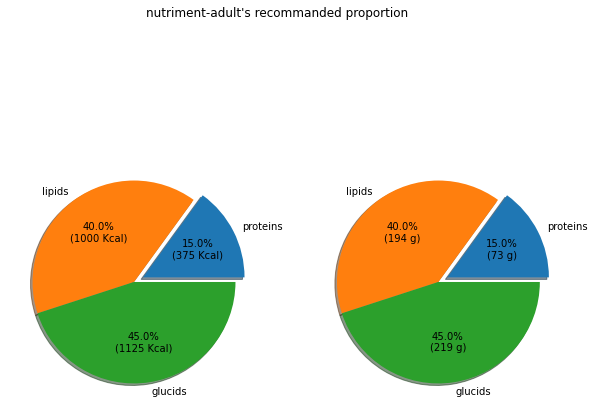

In [145]:
fig, axs = plt.subplots(1,2,figsize=(10,8))
axs[0].pie(x=[0.15, 0.40, 0.45], labels = ['proteins', 'lipids', 'glucids'], explode = [0.1,0,0], shadow = True, autopct = lambda pct : func_kcal(pct))
axs[1].pie(x=[0.15, 0.40, 0.45], labels = ['proteins', 'lipids', 'glucids'], explode = [0.1,0,0], shadow = True, autopct = lambda pct : func_g(pct))
fig.suptitle("nutriment-adult's recommanded proportion")

### Protein's daily apport's analysis 

In [155]:
qte_proteine_hab = dispo_alim_copy.groupby(by=['Zone']).sum()['Disponibilité de protéines en quantité (g/personne/jour)'].reset_index()

In [157]:
qte_proteine_hab.head(10).sort_values('Disponibilité de protéines en quantité (g/personne/jour)', ascending=True)

,Zone,Disponibilité de protéines en quantité (g/personne/jour)
5,Angola,57.27
0,Afghanistan,58.26
6,Antigua-et-Barbuda,83.49
1,Afrique du Sud,85.33
9,Arménie,90.06
7,Arabie saoudite,91.59
3,Algérie,91.92
4,Allemagne,101.39
8,Argentine,102.60
2,Albanie,111.37


In [158]:
qte_protein_hab_cat = pd.cut(qte_proteine_hab['Disponibilité de protéines en quantité (g/personne/jour)'], bins=[0,30,70,90,120,200] , labels=['Very low', 'low', 'normal', 'high', 'too much']).reset_index()
qte_protein_hab_cat.columns
qte_protein_hab_cat.rename(columns={'Zone': 'Pays', 'Disponibilité de protéines en quantité (g/personne/jour)': 'Categorie dispo proteine'}, inplace=True)


In [159]:
qte_protein_hab_cat.groupby(by=['Categorie dispo proteine']).count()

,index
Categorie dispo proteine,
Very low,0
low,59
normal,56
high,54
too much,5


## Generalized food coverage analysis  

In [177]:
#Portion alimentaire est d'0.6kg par jour et par personne
seuil_thoerique_an = 365 * 1
pop_pays_2017_copy = pop_pays_2017.copy()

In [178]:
dispo_alim_copy = dispo_alim.copy()

dispo_alim_pays = pd.DataFrame(dispo_alim_copy.groupby(by='Zone').sum()['Nourriture'])
pop_pays_2017_copy.set_index('Zone', inplace=True)
couver_alimentaire_pays = pd.concat([dispo_alim_pays, pop_pays_2017_copy], axis = 1)

In [179]:
couver_alimentaire_pays['couverture alimentaire (kg / personne / jour)'] = (couver_alimentaire_pays['Nourriture']*1000) / (couver_alimentaire_pays['Valeur'] *365)

In [180]:
couver_alimentaire_pays.dropna(inplace=True)

In [181]:
couver_alimentaire_pays.loc['Mali']

Nourriture                                        7867.000000
Valeur                                           18512.430000
couverture alimentaire (kg / personne / jour)        1.164268
Name: Mali, dtype: float64

In [187]:
couver_alimentaire_pays.sort_values('couverture alimentaire (kg / personne / jour)', ascending = True).head(15)

,Zone,Nourriture,Valeur,couverture alimentaire (kg / personne / jour)
150,Tchad,4097.0,15016.753,0.747476
0,Afghanistan,10735.0,36296.113,0.810306
164,Zambie,5088.0,16853.599,0.827107
170,Éthiopie,33361.0,106399.924,0.859023
56,Gambie,701.0,2213.889,0.867500
163,Yémen,9162.0,27834.819,0.901797
62,Guinée-Bissau,609.0,1828.145,0.912670
165,Zimbabwe,4762.0,14236.595,0.916411
152,Timor-Leste,419.0,1243.258,0.923336
148,Sénégal,5329.0,15419.355,0.946862


In [188]:
couver_alimentaire_pays.reset_index(inplace = True)

In [189]:
nb_pays_sup_seuil = pd.DataFrame((couver_alimentaire_pays['couverture alimentaire (kg / personne / jour)'] > 1)).describe().loc['freq']
nb_total_pays = len(couver_alimentaire_pays)
nb_pays_inf_seuil =  nb_total_pays - nb_pays_sup_seuil
x = list(nb_pays_sup_seuil/nb_total_pays) + list(nb_pays_inf_seuil/nb_total_pays)

In [190]:
serie_categorise = pd.cut(couver_alimentaire_pays['couverture alimentaire (kg / personne / jour)'], bins = [0,1,1.5,2,3,10], labels = ['very poor', 'poor', 'sufficient', 'rich','very rich'])

couver_alimentaire_pays.groupby(serie_categorise)['Zone'].count() / couver_alimentaire_pays.groupby(serie_categorise)['Zone'].count().sum()
prop_rich_alim_pays = couver_alimentaire_pays.groupby(serie_categorise)['Zone'].count() / couver_alimentaire_pays.groupby(serie_categorise)['Zone'].count().sum()


([<matplotlib.patches.Wedge at 0x208b48e9730>,
 [Text(1.0736834627076814, 0.2391732048287244, 'very poor'),
  Text(0.33609474744700385, 1.047396926068878, 'poor'),
  Text(-1.09541601480365, 0.10031826609192221, 'sufficient'),
  Text(0.3551685109863935, -1.0410837280467446, 'rich'),
  Text(1.0934010833731267, -0.12030823279590247, 'very rich')],
 [Text(0.5856455251132807, 0.13045811172475874, '7.0%'),
  Text(0.18332440769836572, 0.571307414219388, '26.2%'),
  Text(-0.5974996444383546, 0.05471905423195756, '30.8%'),
  Text(0.193728278719851, -0.5678638516618606, '32.6%'),
  Text(0.5964005909307962, -0.06562267243412861, '3.5%')])

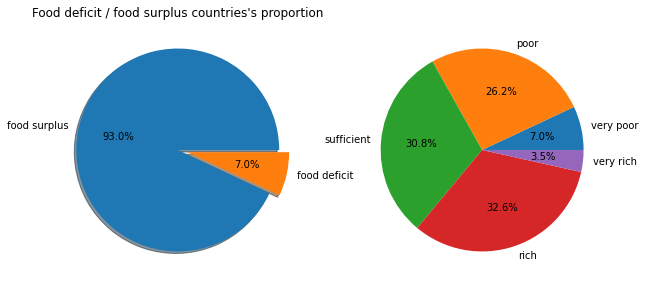

In [191]:
fig, axe = plt.subplots(1,2, figsize=(10,6))
axe[0].pie(x, labels=['food surplus', 'food deficit'], shadow=True, explode=[0,0.1], autopct = '%1.1f%%')
axe[0].set_title("Food deficit / food surplus countries's proportion")
axe[1].pie(prop_rich_alim_pays, labels =['very poor', 'poor', 'sufficient', 'rich','very rich'], autopct = '%1.1f%%')

# 4. Additional analysis to Julien's 

## 4.1 Different way to compute countries's total food ressources

In [192]:
dispo_alim_copy = dispo_alim.copy()
pop_pays_2017_copy = pop_pays_2017.copy()

In [194]:
dispo_alim_copy['Disponibilité intérieur calculée 1'] = dispo_alim['Importations - Quantité'] + dispo_alim['Production'] - dispo_alim['Exportations - Quantité'] + dispo_alim['Variation de stock']
dispo_alim_copy['Disponibilité intérieur calculée 2'] = dispo_alim['Nourriture'] + dispo_alim['Autres Utilisations']  + dispo_alim['Aliments pour animaux'] + dispo_alim['Semences'] + dispo_alim['Traitement'] + dispo_alim['Pertes']

## 4.2 The Cereals's usages distribution

In [195]:
# Récupération des données pour cette analyse

dispo_alim_copy = dispo_alim.copy()
#Extraire la liste des céréales depuis le site FAO
cereals_type = ["Blé", "Maïs", "Riz (Eq Blanchi)", "Orge", "Seigle", "Avoine", "Millet", "Sorgho", "Céréales, Autres"]
utilisation_cereal_cat = dispo_alim_copy[dispo_alim_copy['Produit'].isin(cereals_type)]

In [196]:
def cereals_repartition(df, product = 'all', pays = 'all'):
    
    cereals_usage_2017 = df[dispo_alim_copy['Produit'].isin(cereals_type)].groupby(by=['Zone']).agg({'Aliments pour animaux':'sum',
                                                                                        'Nourriture' : 'sum'})
    cereals_usage_pop = 0
    cereals_usage_animals = 0
     
    
    if (product, pays) == ('all', 'all') : 
        cereals_usage_pop = cereals_usage_2017.Nourriture.sum()
        cereals_usage_animals = cereals_usage_2017['Aliments pour animaux'].sum()
        utilisation_totale_cereale = cereals_usage_2017.sum().sum()
    else :
        if pd.DataFrame(cereals_usage_2017.loc[pays]).empty :
            raise ValueError("'{}' is not defined".format(pays))
        try : 
            cereals_usage_pop = cereals_usage_2017.loc[pays, 'Nourriture']
        except KeyError as e:
            return 'No data'
        
        try : 
             cereals_usage_animals = cereals_usage_2017.loc[pays, 'Aliments pour animaux']
        except KeyError as e:
            return e
        utilisation_totale_cereale = cereals_usage_2017.loc[pays].sum().sum()
    
    prop_utilisation = np.append((cereals_usage_pop / utilisation_totale_cereale),(cereals_usage_animals / utilisation_totale_cereale))
    fig, axe = plt.subplots(figsize=(8,12))
    axe.pie(prop_utilisation, labels = ["fooded population's usage", "fooded animals's usage"], autopct = '%1.1f%%')
        

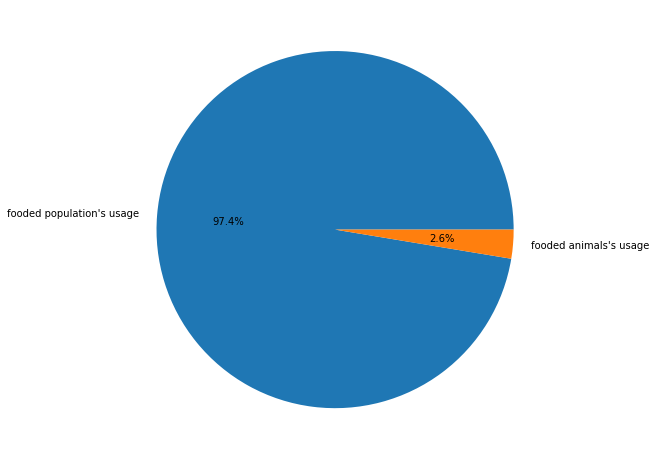

In [204]:
cereals_repartition(dispo_alim_copy, pays = 'Tchad')

## 4.3 The thai's manioc-usage distribution

In [221]:
thai_manioc_prod = dispo_alim_copy.loc[dispo_alim_copy['Produit'] == 'Manioc'].loc[dispo_alim_copy['Zone'] == 'Thaïlande'].loc[:, ].Production
mondiale_manioc_prod = dispo_alim_copy.loc[dispo_alim_copy['Produit'] == 'Manioc', 'Production'].sum()
np_array = np.append(thai_manioc_prod/mondiale_manioc_prod, 1 - thai_manioc_prod/mondiale_manioc_prod)

In [262]:
def absolute_value(pct):
    absolute = round(pct * mondiale_manioc_prod / 100)
    return '{:.1f}%\n({:d} m.t)'.format(pct, absolute)

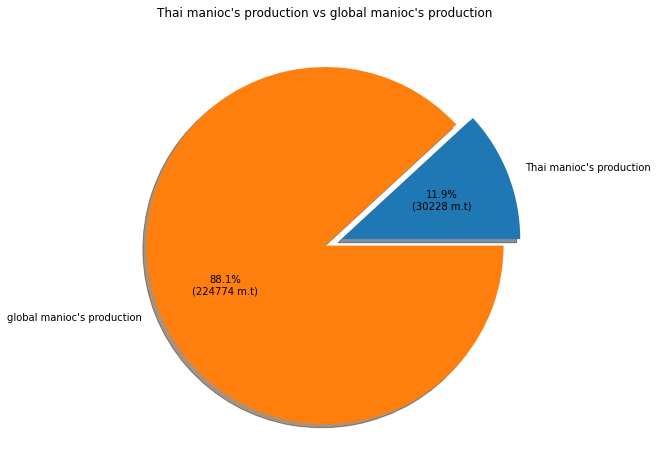

In [269]:
plt.subplots(figsize=(8,12))
plt.pie(x=np_array, labels=["Thai manioc's production","global manioc's production"], explode=[0.1,0], shadow = True, autopct = lambda x : absolute_value(x))
plt.title("Thai manioc's production vs global manioc's production")
plt.show()

In [264]:
dispo_alim_copy.loc[dispo_alim_copy['Produit'] == 'Manioc', 'Production'].sum()

255002.0

In [278]:
dispo_alim_copy.loc[dispo_alim_copy['Produit'] == 'Manioc', ['Production','Nourriture', 'Disponibilité alimentaire (Kcal/personne/jour)']]

,Production,Nourriture,Disponibilité alimentaire (Kcal/personne/jour)
110,0.0,0.0,0.0
390,0.0,0.0,0.0
475,16412.0,4249.0,560.0
563,0.0,0.0,4.0
655,0.0,0.0,0.0
...,...,...,...
15108,0.0,0.0,0.0
15201,0.0,14.0,3.0
15294,46.0,40.0,6.0
15390,0.0,46.0,0.0


In [265]:
manioc_thai_use_cat = dispo_alim_copy.loc[dispo_alim_copy['Produit'] == 'Manioc'].loc[dispo_alim_copy['Zone'] == 'Thaïlande', ['Nourriture','Aliments pour animaux','Exportations - Quantité','Autres Utilisations']].sum()
manioc_total_usage = manioc_thai_use_cat.sum()
manioc_thai_use_prop = manioc_thai_use_cat / manioc_total_usage

In [266]:
def absolute_value_manioc(pct):
    absolute = round(pct * manioc_total_usage / 100)
    return '{:.1f}%\n({:d} m.t)'.format(pct, absolute)

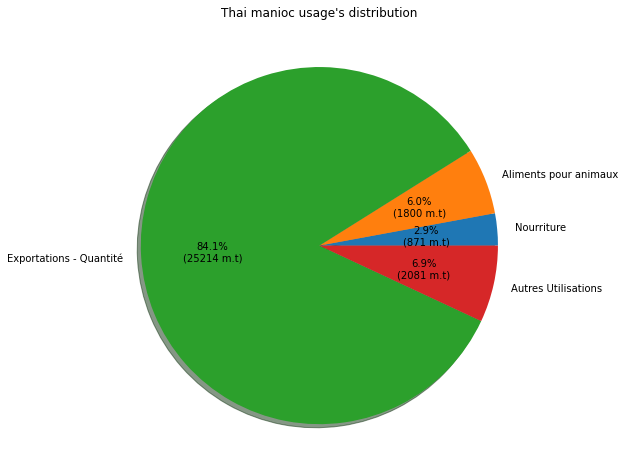

In [268]:
plt.subplots(figsize=(8,12))
plt.pie(manioc_thai_use_prop, labels = manioc_thai_use_cat.index, shadow = True, autopct = lambda x : absolute_value_manioc(x))
plt.title("Thai manioc usage's distribution")
plt.show()